In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import emcee
import corner

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import MCMCSampler
from nnest.likelihoods import *
from nnest.priors import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood
#like = Himmelblau(2)
#prior = UniformPrior(2, -5, 5)
#like = Rosenbrock(2)
#prior = UniformPrior(2, -2, 5)
#like = Gaussian(2, 0.9)
#prior = UniformPrior(2, -5, 5)
#like = Eggbox(2)
#prior = UniformPrior(2, -15, 15)
like = GaussianShell(2)
prior = UniformPrior(2, -3, 3)
#like = GaussianMix(2)
#prior = UniformPrior(2, -8, 8)
#like = DoubleGaussianShell(2, centers=[[-4.0, 0.0], [4.0, 0.0]])
#prior = UniformPrior(2, [-7, -3], [7, 3])

In [6]:
def transformed_loglike(x):
    return like(x) + prior(x)

In [7]:
num_walkers = 100

In [8]:
sampler = emcee.EnsembleSampler(num_walkers, like.x_dim, transformed_loglike)

In [9]:
state = prior.sample(num_walkers)

In [10]:
for i in range(10):
    state = sampler.run_mcmc(state, 1)
    if i % 10 == 0:
        print(i, np.mean(sampler.acceptance_fraction))

0 0.29


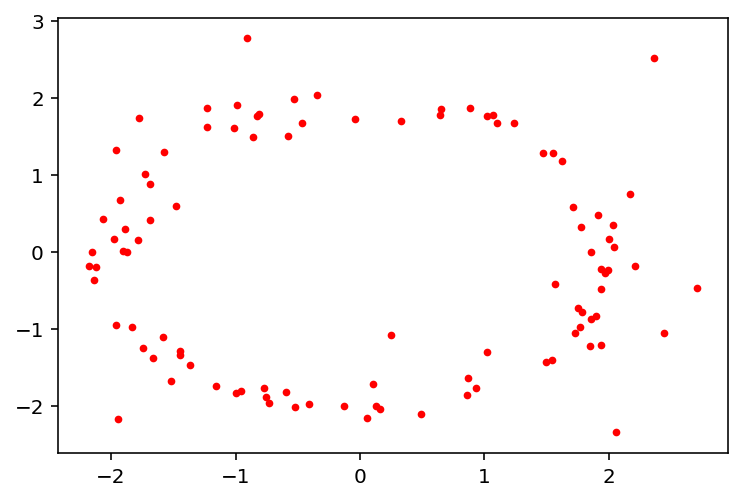

In [11]:
plt.scatter(state.coords[:,0], state.coords[:,1], s=8, color='r')
plt.show()

In [13]:
for i in range(1000):
    state = sampler.run_mcmc(state, 1)
    if i % 100 == 0:
        print(i, np.mean(sampler.acceptance_fraction))

0 0.27818181818181814
100 0.2536936936936937
200 0.25502369668246444
300 0.2536334405144695
400 0.25613138686131387
500 0.2570254403131116
600 0.2563829787234042
700 0.25593530239099854
800 0.25464858199753393
900 0.2539956092206367


In [14]:
like.num_evaluations

101100

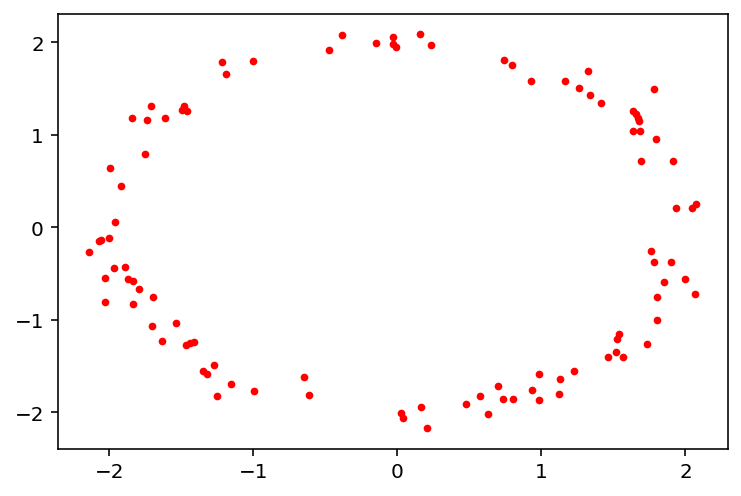

In [15]:
plt.scatter(state.coords[:,0], state.coords[:,1], s=8, color='r')
plt.show()

In [16]:
samples = sampler.get_chain()

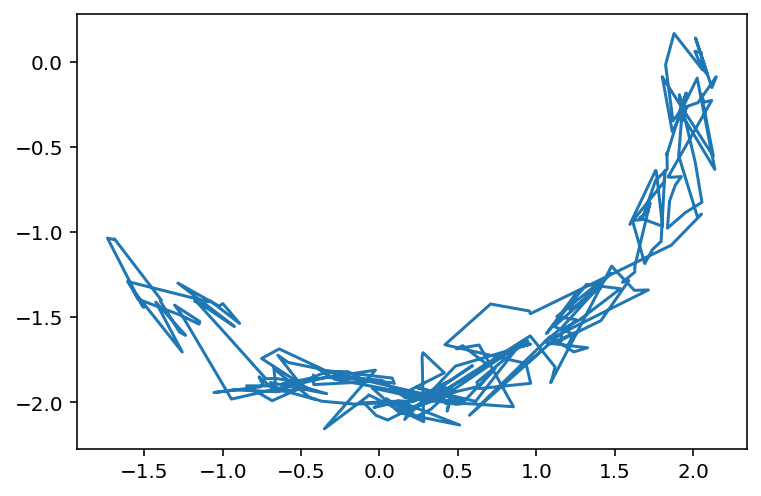

In [22]:
plt.plot(samples[:,1,0], samples[:,1,1])
plt.show()

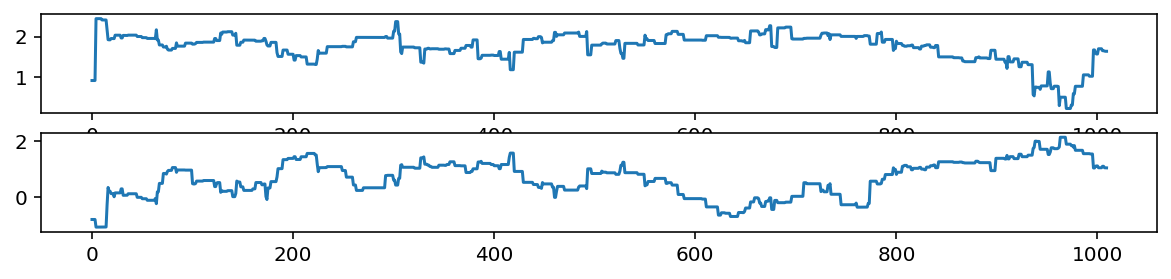

In [23]:
fig, ax = plt.subplots(like.x_dim, 1, figsize=(10, like.x_dim))
for i in range(like.x_dim):
    ax[i].plot(samples[:, 0, i])
plt.show()

In [24]:
flat_samples = sampler.get_chain(flat=True)

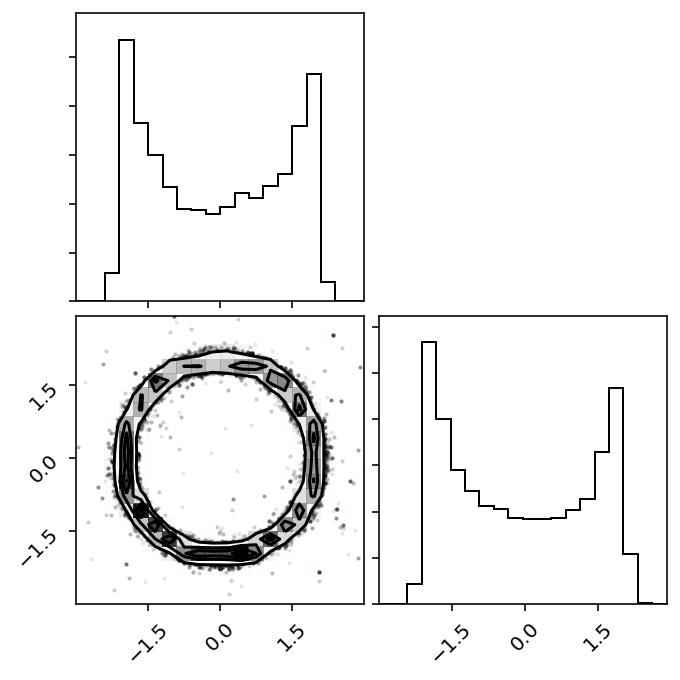

In [26]:
fig = corner.corner(flat_samples)